<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


$ \ $ 

# ***Space X Falcon 9 First Stage Landing Prediction.***

## ***Objectives.***

$(1)$ Perform exploratory Data Analysis and determine Training Labels.

* Create a column for the class.

* Standardize the data.

* Split into training data and test data.

$(2)$ Find best Hyperparameter for SVM, Classification Trees and Logistic Regression.

* Find the method performs best using test data.



$ \ $

----

## ***Import Libraries and Define Auxiliary Functions.***

We will import the following libraries for the lab.

In [1]:
#(1) Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

#(2) NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

#(3) Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

#(4) Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

#(5) Preprocessing allows us to standarsize our data
from sklearn import preprocessing

#(6) Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split

#(7) Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

#(8) Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

#(9) Support Vector Machine classification algorithm
from sklearn.svm import SVC

#(10) Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

#(11) K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier


$ \ $

-----

## ***Confusion matrix.***

This function is to plot the confusion matrix.

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

$ \ $

-----

## ***Load the dataframe.***

We load the data.

In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


$ \ $

----

## ***TASK 1.***

Create a NumPy array from the column Class in data (data["Class"]), by applying the method `to_numpy()` then assign it to the variable $Y$, make sure the output is a Pandas series (only one bracket df['name of column']).

In [5]:
Y = data["Class"].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

$ \ $

-----

## ***TASK 2.***

Standardize the data in $X$ then reassign it to the variable $X$ using the transform provided below.

In [6]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

$ \ $ 

----

## ***TASK 3.***

$(1)$ Use the function train_test_split to split the data $X$ and $Y$ into training and test data. Set the parameter 

* `test_size = 0.2` 

* `random_state = 2`


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

$ \ $

$(2)$ We can see we only have 18 test samples.

In [8]:
Y_test.shape 

(18,)

$ \ $

----

## ***TASK 4.***

$(1)$ To begin with, construct the following things:

* Create a logistic regression object with name lr.

* Create a GridSearchCV object logreg_cv with $cv = 10$ using lr and the parameters given below.

* Fit logreg_cv to find the best parameters from the dictionary parameters.

In [9]:
#help(LogisticRegression)

In [ ]:
#help(GridSearchCV)

In [11]:
parameters = {"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}

lr = LogisticRegression()

logreg_cv = GridSearchCV(lr, param_grid=parameters, cv = 10)

logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the GridSearchCV object for logistic regression. 

$ \ $

$(2)$ We display the best parameters using:

* The data attribute `best_params_` 

* The accuracy on the validation data using the data attribute `best_score_`.

In [12]:
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


$ \ $ 

-----

## ***TASK 5.***

$(1)$ Calculate the accuracy on the test data using the method score.

In [13]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

$ \ $

$(2)$ Lets look at the confusion matrix:

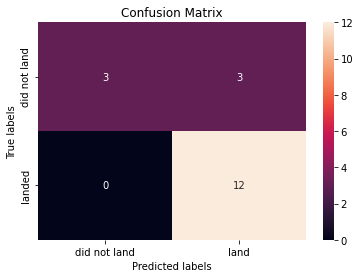

In [14]:
yhat=logreg_cv.predict(X_test)

plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.

$ \ $

-----

## ***TASK 6.***

* Create a support vector machine object then create a GridSearchCV object `svm_cv` with $cv = 10$. 

* Fit the object to find the best parameters from the dictionary parameters.

In [15]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [16]:
svm_cv = GridSearchCV(svm, param_grid=parameters, cv = 10)

svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [17]:
print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


$ \ $

-----


## ***TASK  7.***

$(1)$ Calculate the accuracy on the test data using the method score.


In [18]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

$ \ $

$(2)$ We can plot the confusion matrix.

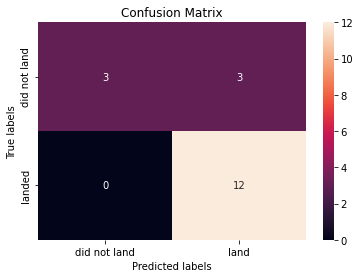

In [19]:
yhat = svm_cv.predict(X_test)

plot_confusion_matrix(Y_test, yhat)

$ \ $

----

## ***Task 8.***

* Create a decision tree classifier object with name tree.

* Create a GridSearchCV object tree_cv with cv = 10 and name tree_cv. 

* Fit tree_cv to find the best parameters from the dictionary parameters.

In [30]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [31]:
tree_cv = GridSearchCV(tree, param_grid = parameters, cv = 10)

tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [32]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'random'}

$ \ $ 

-----

## ***Task 9.***

Calculate the accuracy of `tree_cv` on the test data using the method score:

In [33]:
tree_cv.score(X_test, Y_test)

0.6666666666666666

$ \ $ 

-----

## ***Task 10.***

* Create a $k$ - nearest neighbors object.

* then create a GridSearchCV object knn_cv with cv = 10. 

* Fit the object to find the best parameters from the dictionary parameters.

In [34]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [35]:
knn_cv = GridSearchCV(KNN, param_grid = parameters, cv = 10)

knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [36]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


$ \ $ 

----

## ***TASK 11.***

$(1)$ Calculate the accuracy of knn_cv on the test data using the method score.

In [37]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

$ \ $

$(2)$ We can plot the confusion matrix.

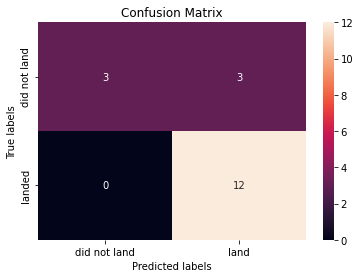

In [38]:
yhat = knn_cv.predict(X_test)

plot_confusion_matrix(Y_test,yhat)

$ \ $ 

-----

## ***TASK 12.***

Find the method performs best.

In [39]:
print('Accuracy for Logistics Regression method:', logreg_cv.score(X_test, Y_test))
print('Accuracy for Support Vector Machine method:', svm_cv.score(X_test, Y_test))
print('Accuracy for Decision tree method:', tree_cv.score(X_test, Y_test))
print('Accuracy for K nearest neighbors method:', knn_cv.score(X_test, Y_test))

Accuracy for Logistics Regression method: 0.8333333333333334
Accuracy for Support Vector Machine method: 0.8333333333333334
Accuracy for Decision tree method: 0.6666666666666666
Accuracy for K nearest neighbors method: 0.8333333333333334
